Populating the interactive namespace from numpy and matplotlib
 omega 3.90361020238
(ka)^3 0.0310062766803


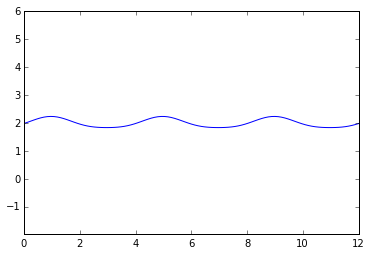

In [4]:
%pylab inline
g=9.8
k = 2.0*pi/4.0
h = 2.0
a = 0.1*h
sigma = tanh(k*h)
omega = (sqrt(g*k*sigma*(1.0 + (9.0 - 10.0*sigma**2 + 9.0*sigma**4*(k*a)**2)/(8.0*tanh(k*h)**4))))
print "omega",omega
c = omega/k
print "(ka)^3",((k*a)**3)
def theta(x,t):
    return k*x - omega*t
def eta(x,t):
    sigma = tanh(k*h)
    theta = k*x - omega*t
    return a*(cos(theta) + k*a*cos(2.0*theta)*(3.0-sigma**2)/(4.0*sigma**3))
L = 6.0*pi/k
nx=101
dx = L/float(nx-1)
xl = [i*dx for i in range(nx)]
hl = [h+eta(x,2.0) for x in xl]
pyplot.axis('equal')
pyplot.plot(xl,hl)

In [5]:
from sympy import *
x,z,t = symbols('x,z,t')
Phi = ((a*omega*cosh(k*(z+h))/(k*sinh(k*h))) \
*(sin(k*x - omega*t) + sin(2.0*(k*x - omega*t))*k*a*3*cosh(2.0*k*(z+h))/(8.0*sinh(k*h)**3) \
- (k*a)**2 * g*t/(2.0*sinh(2.0*k*h)*k)))
u = diff(Phi,x)
w = diff(Phi,z)

(40,) (40,) (40, 40) (40, 40)


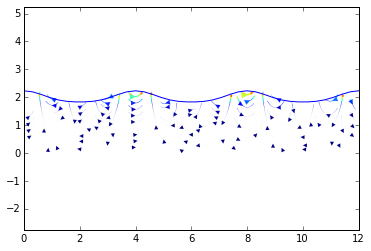

In [6]:
X = np.linspace(0,float(6.0*pi/k),40)
Z = np.linspace(0,float(h+a),40)
U = np.zeros((40,40),'d')
W = np.zeros((40,40),'d')
T=0.0
for J,xi in enumerate(X):
    for I,zi in enumerate(Z):
        z_surf = h+eta(xi,T)
        if zi < z_surf:
            UIJ = (u.evalf(subs={x:xi,z:zi,t:T})).n()
            WIJ = (w.evalf(subs={x:xi,z:zi,t:T})).n()
            U[I,J] =  UIJ
            W[I,J] = WIJ
        else:
            U[I,J] = 0.0
            W[I,J] = 0.0
speed = np.sqrt(U*U + W*W)
print X.shape,Z.shape,U.shape,W.shape
hl = [h+eta(xi,T) for xi in X]
pyplot.axis('equal')
pyplot.plot(X,hl)
pyplot.streamplot(X, Z, U, W,density=(1,1), color=speed,linewidth=2.5*speed/speed.max())